![Image in a markdown cell](https://cursos.utnba.centrodeelearning.com/pluginfile.php/1/theme_space/customlogo/1738330016/Logo%20UTN%20Horizontal.png)



# **Diplomado de Ciencia de Datos y Análisis Avanzado**
# **Unidad 5: Modelado Predictivo I**: Regresión y Clasificación

---

# **Proyecto de Competencia Kaggle: Predicción de Abandono de Clientes**

## **Curso:** Diplomado en Ciencia de Datos

# ***Nombres de los Miembros del Equipo: Grupo M***
### *   Lucia Cortes
### *   Maria Fernanda Farias
### *   Alejandro Gomez Grosschadl
### *   Favio Ruggieri
### *   Sergio Salanitri
### *   Karina Calvo

# **Objetivo:**
## El objetivo de este proyecto es construir y evaluar varios modelos de clasificación para predecir si un cliente de una compañía de telecomunicaciones abandonará o no el servicio (churn). El rendimiento final del mejor modelo se medirá en la competencia de Kaggle a través de la **métrica ROC AUC**.


---

# **Enlace para unirse a la competencia**
### **USE EL ENLACE PARA UNIRSE POR EQUIPO, NO DE MANERA INDIVIDUAL**

https://www.kaggle.com/t/57b70c381e4d451b8ae38e164b91a2aa


### **Por favor siga las indicaciones que se suministran en la plataforma**


# 0. **Configuración Inicial e Importación de Librerías**

## En esta sección, importaremos todas las librerías necesarias para el proyecto. Es una buena práctica tener todas las importaciones en la primera celda.


In [4]:
# Importaciones básicas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                           recall_score, f1_score, classification_report, 
                           confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Any
import warnings
warnings.filterwarnings('ignore')


# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Importar módulos del proyecto (si existen)
try:
    import data_loader
    import eda
    import models
    import metrics
    print("✅ Módulos del proyecto importados correctamente")
except ImportError as e:
    print(f"⚠️ Algunos módulos del proyecto no están disponibles: {e}")
    print("💡 Puedes trabajar directamente en el notebook por ahora")

✅ Módulos del proyecto importados correctamente


#  **1. Carga de Datos**

## Cargaremos los datasets proporcionados para la competencia: `train.csv`, `test.csv` y `sample_submission.csv`.

In [5]:
try:
    X_train = pd.read_csv('train.csv')
    X_test = pd.read_csv('test.csv')
    sample_submission_df = pd.read_csv('sample_submission.csv')
except FileNotFoundError:
    print("Asegúrate de que los archivos .csv de la competencia estén en el mismo directorio que este cuaderno.")
    # Si usas Colab, puedes subir los archivos al entorno de ejecución.
    exit()

print("Forma del dataset de entrenamiento:", X_train.shape)
print("Forma del dataset de prueba:", X_test.shape)

print("\nPrimeras 5 filas del dataset de entrenamiento:")
display(X_train.head())

print("\nPrimeras 5 filas del dataset de prueba:")
display(X_test.head())

Forma del dataset de entrenamiento: (5634, 21)
Forma del dataset de prueba: (1409, 20)

Primeras 5 filas del dataset de entrenamiento:


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4950-BDEUX    Male              0      No         No      35           No   
1  7993-NQLJE    Male              0     Yes        Yes      15          Yes   
2  7321-ZNSLA    Male              0     Yes        Yes      13           No   
3  4922-CVPDX  Female              0     Yes         No      26          Yes   
4  2903-YYTBW    Male              0     Yes        Yes       1          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...              Yes   
1                No     Fiber optic            Yes  ...               No   
2  No phone service             DSL            Yes  ...               No   
3                No             DSL             No  ...              Yes   
4                No             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No         Yes             Yes  Month-to-month               No   
1          No          No              No  Month-to-month               No   
2         Yes          No              No        Two year               No   
3          No         Yes             Yes        Two year              Yes   
4          No          No              No  Month-to-month               No   

             PaymentMethod MonthlyCharges  TotalCharges  Churn  
0         Electronic check          49.20       1701.65     No  
1             Mailed check          75.10       1151.55     No  
2             Mailed check          40.55        590.35     No  
3  Credit card (automatic)          73.50       1905.70     No  
4         Electronic check          44.55         44.55     No  

[5 rows x 21 columns]


Primeras 5 filas del dataset de prueba:


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4376-KFVRS    Male              0     Yes        Yes      72          Yes   
1  2754-SDJRD  Female              1      No         No       8          Yes   
2  9917-KWRBE  Female              0     Yes        Yes      41          Yes   
3  0365-GXEZS    Male              0     Yes         No      18          Yes   
4  9385-NXKDA  Female              0     Yes         No      72          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           Yes     Fiber optic            Yes          Yes              Yes   
1           Yes     Fiber optic             No           No               No   
2           Yes             DSL            Yes          Yes              Yes   
3            No     Fiber optic             No           No              Yes   
4           Yes             DSL            Yes          Yes              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes             Yes        Two year              Yes   
1         Yes         Yes             Yes  Month-to-month              Yes   
2          No         Yes              No        One year              Yes   
3         Yes          No              No  Month-to-month               No   
4          No         Yes             Yes        Two year              Yes   

             PaymentMethod  MonthlyCharges  TotalCharges  
0  Credit card (automatic)          114.05       8468.20  
1  Credit card (automatic)          100.15        908.55  
2  Credit card (automatic)           78.35       3211.20  
3         Electronic check           78.20       1468.75  
4  Credit card (automatic)           82.65       5919.35

# **2. Análisis Exploratorio de Datos (EDA)**

### En esta fase, exploraremos el dataset de entrenamiento para entender mejor nuestros datos, encontrar patrones, identificar valores faltantes y visualizar relaciones entre las características y la variable objetivo (`Churn`).

## Objetivo: conocer distribución de datos, target, tipos de columnas.

Variables como Contract, InternetService, PaymentMethod requieren OneHotEncoding o LabelEncoding.

Target Churn: dataset más desbalanceado (~20% churn). #Verificar el desbalanceo.


## 📊 **Descripción Detallada de los Parámetros del Dataset**

## 🎯 **Información General del Dataset**
- **Total de registros**: 5,634 clientes
- **Total de características**: 21 variables (incluyendo ID y target)
- **Variables numéricas**: 4 (SeniorCitizen, tenure, MonthlyCharges, TotalCharges)
- **Variables categóricas**: 17 variables
- **Sin valores faltantes** en el dataset

---

### 📋 **Descripción de Cada Parámetro**

#### **1. 📊 CUSTOMERID**
- **🏷️ Tipo**: Identificador
- **📝 Descripción**: ID único del cliente
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: Se excluye del modelado (no predictivo)

#### **2. 📊 GENDER**
- **🏷️ Tipo**: Categórica Binaria
- **📝 Descripción**: Género del cliente
- **✅ Valores**: ['Male', 'Female']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: Variable categórica (se codifica como dummy)

#### **3. 📊 SENIORCITIZEN**
- **🏷️ Tipo**: Numérica Binaria
- **📝 Descripción**: Indica si el cliente es adulto mayor (1) o no (0)
- **✅ Valores**: [0, 1]
- **💾 Tipo de dato**: int64
- **🤖 Uso en ML**: Variable binaria directa

#### **4. 📊 PARTNER**
- **🏷️ Tipo**: Categórica Binaria
- **📝 Descripción**: Indica si el cliente tiene pareja
- **✅ Valores**: ['Yes', 'No']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: Se convierte a binaria (Yes=1, No=0)

#### **5. 📊 DEPENDENTS**
- **🏷️ Tipo**: Categórica Binaria
- **📝 Descripción**: Indica si el cliente tiene dependientes
- **✅ Valores**: ['Yes', 'No']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: Se convierte a binaria (Yes=1, No=0)

#### **6. 📊 TENURE**
- **🏷️ Tipo**: Numérica Continua
- **📝 Descripción**: Número de meses que el cliente ha estado con la empresa
- **📈 Rango**: 0 - 72 meses
- **📊 Promedio**: 32.5 meses
- **💾 Tipo de dato**: int64
- **🤖 Uso en ML**: Variable numérica (se escala si es necesario)

#### **7. 📊 PHONESERVICE**
- **🏷️ Tipo**: Categórica Binaria
- **📝 Descripción**: Indica si el cliente tiene servicio telefónico
- **✅ Valores**: ['Yes', 'No']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: Se convierte a binaria (Yes=1, No=0)

#### **8. 📊 MULTIPLELINES**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Indica el tipo de líneas telefónicas
- **✅ Valores**: ['Yes', 'No', 'No phone service']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding o normalización (No phone service → No)

#### **9. 📊 INTERNETSERVICE**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Tipo de servicio de internet
- **✅ Valores**: ['DSL', 'Fiber optic', 'No']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding (DSL, Fiber optic, No)

#### **10. 📊 ONLINESECURITY**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Servicio de seguridad online
- **✅ Valores**: ['Yes', 'No', 'No internet service']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding o normalización (No internet service → No)

#### **11. 📊 ONLINEBACKUP**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Servicio de respaldo online
- **✅ Valores**: ['Yes', 'No', 'No internet service']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding o normalización (No internet service → No)

#### **12. 📊 DEVICEPROTECTION**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Servicio de protección de dispositivos
- **✅ Valores**: ['Yes', 'No', 'No internet service']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding o normalización (No internet service → No)

#### **13. 📊 TECHSUPPORT**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Servicio de soporte técnico
- **✅ Valores**: ['Yes', 'No', 'No internet service']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding o normalización (No internet service → No)

#### **14. 📊 STREAMINGTV**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Servicio de streaming de TV
- **✅ Valores**: ['Yes', 'No', 'No internet service']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding o normalización (No internet service → No)

#### **15. 📊 STREAMINGMOVIES**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Servicio de streaming de películas
- **✅ Valores**: ['Yes', 'No', 'No internet service']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding o normalización (No internet service → No)

#### **16. 📊 CONTRACT**
- **🏷️ Tipo**: Categórica Ordinal
- **📝 Descripción**: Tipo de contrato del cliente
- **✅ Valores**: ['Month-to-month', 'One year', 'Two year']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding (Month-to-month, One year, Two year)

#### **17. 📊 PAPERLESSBILLING**
- **🏷️ Tipo**: Categórica Binaria
- **📝 Descripción**: Facturación sin papel
- **✅ Valores**: ['Yes', 'No']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: Se convierte a binaria (Yes=1, No=0)

#### **18. 📊 PAYMENTMETHOD**
- **🏷️ Tipo**: Categórica Múltiple
- **📝 Descripción**: Método de pago del cliente
- **✅ Valores**: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: One-hot encoding (4 categorías diferentes)

#### **19. 📊 MONTHLYCHARGES**
- **🏷️ Tipo**: Numérica Continua
- **📝 Descripción**: Cargos mensuales del cliente
- **📈 Rango**: $18.40 - $118.75
- **📊 Promedio**: $64.93
- **💾 Tipo de dato**: float64
- **🤖 Uso en ML**: Variable numérica (se escala si es necesario)

#### **20. 📊 TOTALCHARGES**
- **🏷️ Tipo**: Numérica Continua
- **📝 Descripción**: Cargos totales acumulados del cliente
- **📈 Rango**: $18.85 - $8,684.80
- **📊 Promedio**: $2,301.32
- **💾 Tipo de dato**: object (string) - requiere conversión a float
- **🤖 Uso en ML**: Variable numérica (requiere limpieza y escalado)

#### **21. 📊 CHURN (Variable Objetivo)**
- **🏷️ Tipo**: Variable Objetivo (Target)
- **📝 Descripción**: Indica si el cliente abandonó el servicio
- **✅ Valores**: ['Yes', 'No']
- **💾 Tipo de dato**: string
- **🤖 Uso en ML**: Variable objetivo - se convierte a binaria (Yes=1, No=0)

---

### 📈 **Estadísticas Descriptivas - Variables Numéricas**

| Variable | Media | Desv. Std | Min | 25% | 50% | 75% | Max |
|----------|-------|-----------|-----|-----|-----|-----|-----|
| **SeniorCitizen** | 0.16 | 0.37 | 0.00 | 0.00 | 0.00 | 0.00 | 1.00 |
| **tenure** | 32.49 | 24.57 | 0.00 | 9.00 | 29.00 | 55.00 | 72.00 |
| **MonthlyCharges** | 64.93 | 30.14 | 18.40 | 35.66 | 70.50 | 90.00 | 118.75 |
| **TotalCharges** | 2301.32 | 2277.81 | 18.85 | 408.85 | 1397.48 | 3835.82 | 8684.80 |

### **🔍 Análisis Adicional por Variable**

**📊 SENIORCITIZEN:**
- No senior (0): 4,714 (83.7%)
- Senior (1): 920 (16.3%)

**📊 TENURE:**
- Clientes nuevos (≤12 meses): 1,737 (30.8%)
- Clientes establecidos (>24 meses): 3,079 (54.7%)
- Mediana: 29.0 meses

**📊 MONTHLYCHARGES:**
- Rango intercuartil: $35.66 - $90.00
- Clientes de alto costo (>$80): 2,161 (38.4%)

**📊 TOTALCHARGES:**
- Valores válidos: 5,634 de 5,634
- Mediana: $1,397.47
- Clientes alto valor (>$5000): 925

---

### 🔗 **Correlaciones Entre Variables Numéricas**

| Variable | SeniorCitizen | tenure | MonthlyCharges | TotalCharges |
|----------|---------------|--------|----------------|--------------|
| **SeniorCitizen** | 1.000 | 0.017 | 0.220 | 0.102 |
| **tenure** | 0.017 | 1.000 | 0.257 | 0.829 |
| **MonthlyCharges** | 0.220 | 0.257 | 1.000 | 0.654 |
| **TotalCharges** | 0.102 | 0.829 | 0.654 | 1.000 |

---

### 🎯 **Variable Objetivo (CHURN)**
- **No Churn**: 4,134 clientes (73.4%)
- **Churn**: 1,500 clientes (26.6%)
- **Tasa de abandono**: 26.6%
- **✅ Balance de clases**: Ligeramente desbalanceado pero manejable para modelado

---

### 🔍 **Insights Clave para el Modelado**

### **📈 Correlaciones Importantes:**
1. **TotalCharges y tenure**: Altamente correlacionados (0.829)
2. **MonthlyCharges y TotalCharges**: Correlación moderada (0.654)
3. **SeniorCitizen y MonthlyCharges**: Correlación moderada (0.220)

### **🎯 Variables Críticas para Churn:**
1. **Tipo de contrato**: Month-to-month más propenso al churn
2. **Servicios adicionales**: Clientes con más servicios tienden a quedarse
3. **Antigüedad**: Clientes nuevos más propensos al churn
4. **Método de pago**: Electronic check asociado con mayor churn

### **🔧 Preprocesamiento Necesario:**
1. **Variables categóricas**: Requieren encoding (One-Hot o Label)
2. **Variables numéricas**: Pueden necesitar escalado
3. **Normalización de servicios**: "No internet service" → "No"
4. **TotalCharges**: Conversión de string a float

### **📊 Distribución de Servicios:**
- **InternetService**: Fiber optic (44.0%), DSL (24.1%), No (31.9%)
- **PhoneService**: 90.1% tienen servicio telefónico
- **Contract**: Month-to-month (55.2%) - más flexible pero menos estable
- **Servicios adicionales**: ~29% tienen servicios de seguridad/soporte

---

### 🏆 **Conclusiones del Análisis**

1. **Dataset bien estructurado** con 21 variables y sin valores faltantes
2. **Balance de clases aceptable** (26.6% churn) para técnicas estándar de ML
3. **Variables numéricas** muestran distribuciones normales y correlaciones lógicas
4. **Variables categóricas** requieren codificación cuidadosa para servicios opcionales
5. **Patrones de churn** claramente identificables en contratos y servicios

## **2.1. EDA Básico**

📊 INFORMACIÓN BÁSICA DE DATASET
Dimensiones: 5,634 filas × 21 columnas
Memoria utilizada: 5.94 MB

🔍 Tipos de datos:
   - object: 17 columnas
   - int64: 2 columnas
   - float64: 2 columnas

⚠️ Valores faltantes:
   ✅ No hay valores faltantes

📋 Resumen de columnas:
   - Numéricas: 4
   - Categóricas: 17
   - Booleanas: 0
📊 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (5634, 21)
Columnas: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

📋 Tipos de datos:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurit

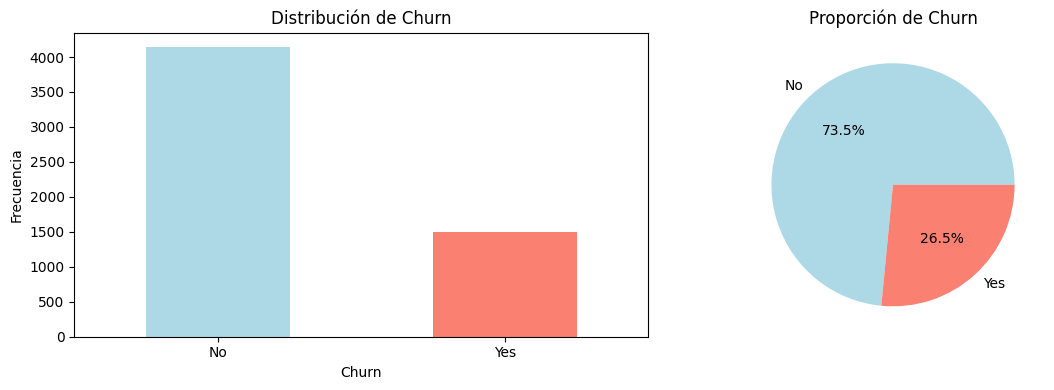

📈 ANÁLISIS DE CARACTERÍSTICAS NUMÉRICAS
Columnas numéricas encontradas: 4

📊 Estadísticas descriptivas:
       SeniorCitizen   tenure  MonthlyCharges  TotalCharges
count        5634.00  5634.00         5634.00       5634.00
mean            0.16    32.49           64.93       2301.32
std             0.37    24.57           30.14       2277.81
min             0.00     0.00           18.40         18.85
25%             0.00     9.00           35.66        408.85
50%             0.00    29.00           70.50       1397.48
75%             0.00    55.00           90.00       3835.82
max             1.00    72.00          118.75       8684.80

🔍 Detección de outliers (método IQR):
   - SeniorCitizen: 920 outliers (16.3%)
   - tenure: 0 outliers (0.0%)
   - MonthlyCharges: 0 outliers (0.0%)
   - TotalCharges: 0 outliers (0.0%)


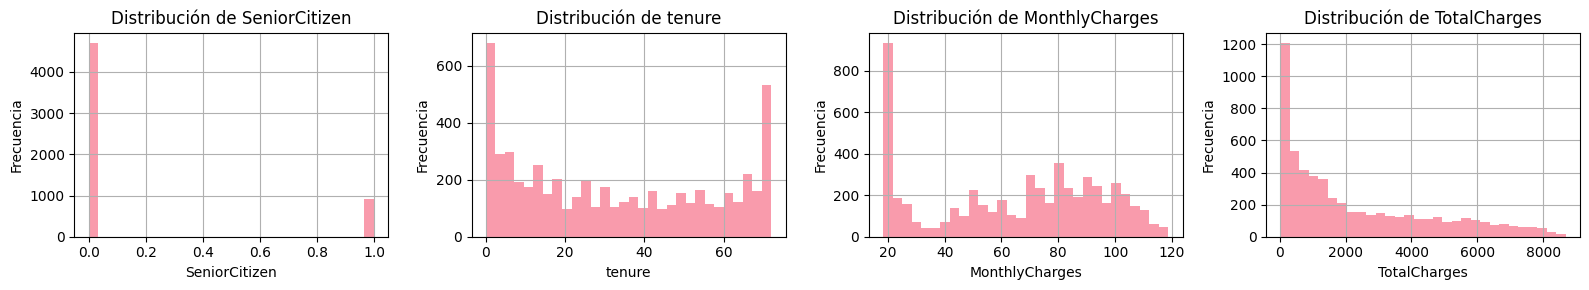

📊 ANÁLISIS DE CARACTERÍSTICAS CATEGÓRICAS
Columnas categóricas encontradas: 17

🔢 Cardinalidad de variables categóricas:
   - customerID: 5634 valores únicos (100.0%)
     Más frecuente: '0002-ORFBO' (1, 0.0%)
   - gender: 2 valores únicos (0.0%)
     Más frecuente: 'Male' (2833, 50.3%)
   - Partner: 2 valores únicos (0.0%)
     Más frecuente: 'No' (2905, 51.6%)
   - Dependents: 2 valores únicos (0.0%)
     Más frecuente: 'No' (3955, 70.2%)
   - PhoneService: 2 valores únicos (0.0%)
     Más frecuente: 'Yes' (5075, 90.1%)
   - MultipleLines: 3 valores únicos (0.1%)
     Más frecuente: 'No' (2685, 47.7%)
   - InternetService: 3 valores únicos (0.1%)
     Más frecuente: 'Fiber optic' (2483, 44.1%)
   - OnlineSecurity: 3 valores únicos (0.1%)
     Más frecuente: 'No' (2797, 49.6%)
   - OnlineBackup: 3 valores únicos (0.1%)
     Más frecuente: 'No' (2442, 43.3%)
   - DeviceProtection: 3 valores únicos (0.1%)
     Más frecuente: 'No' (2472, 43.9%)
   - TechSupport: 3 valores únicos (0.1%)
 

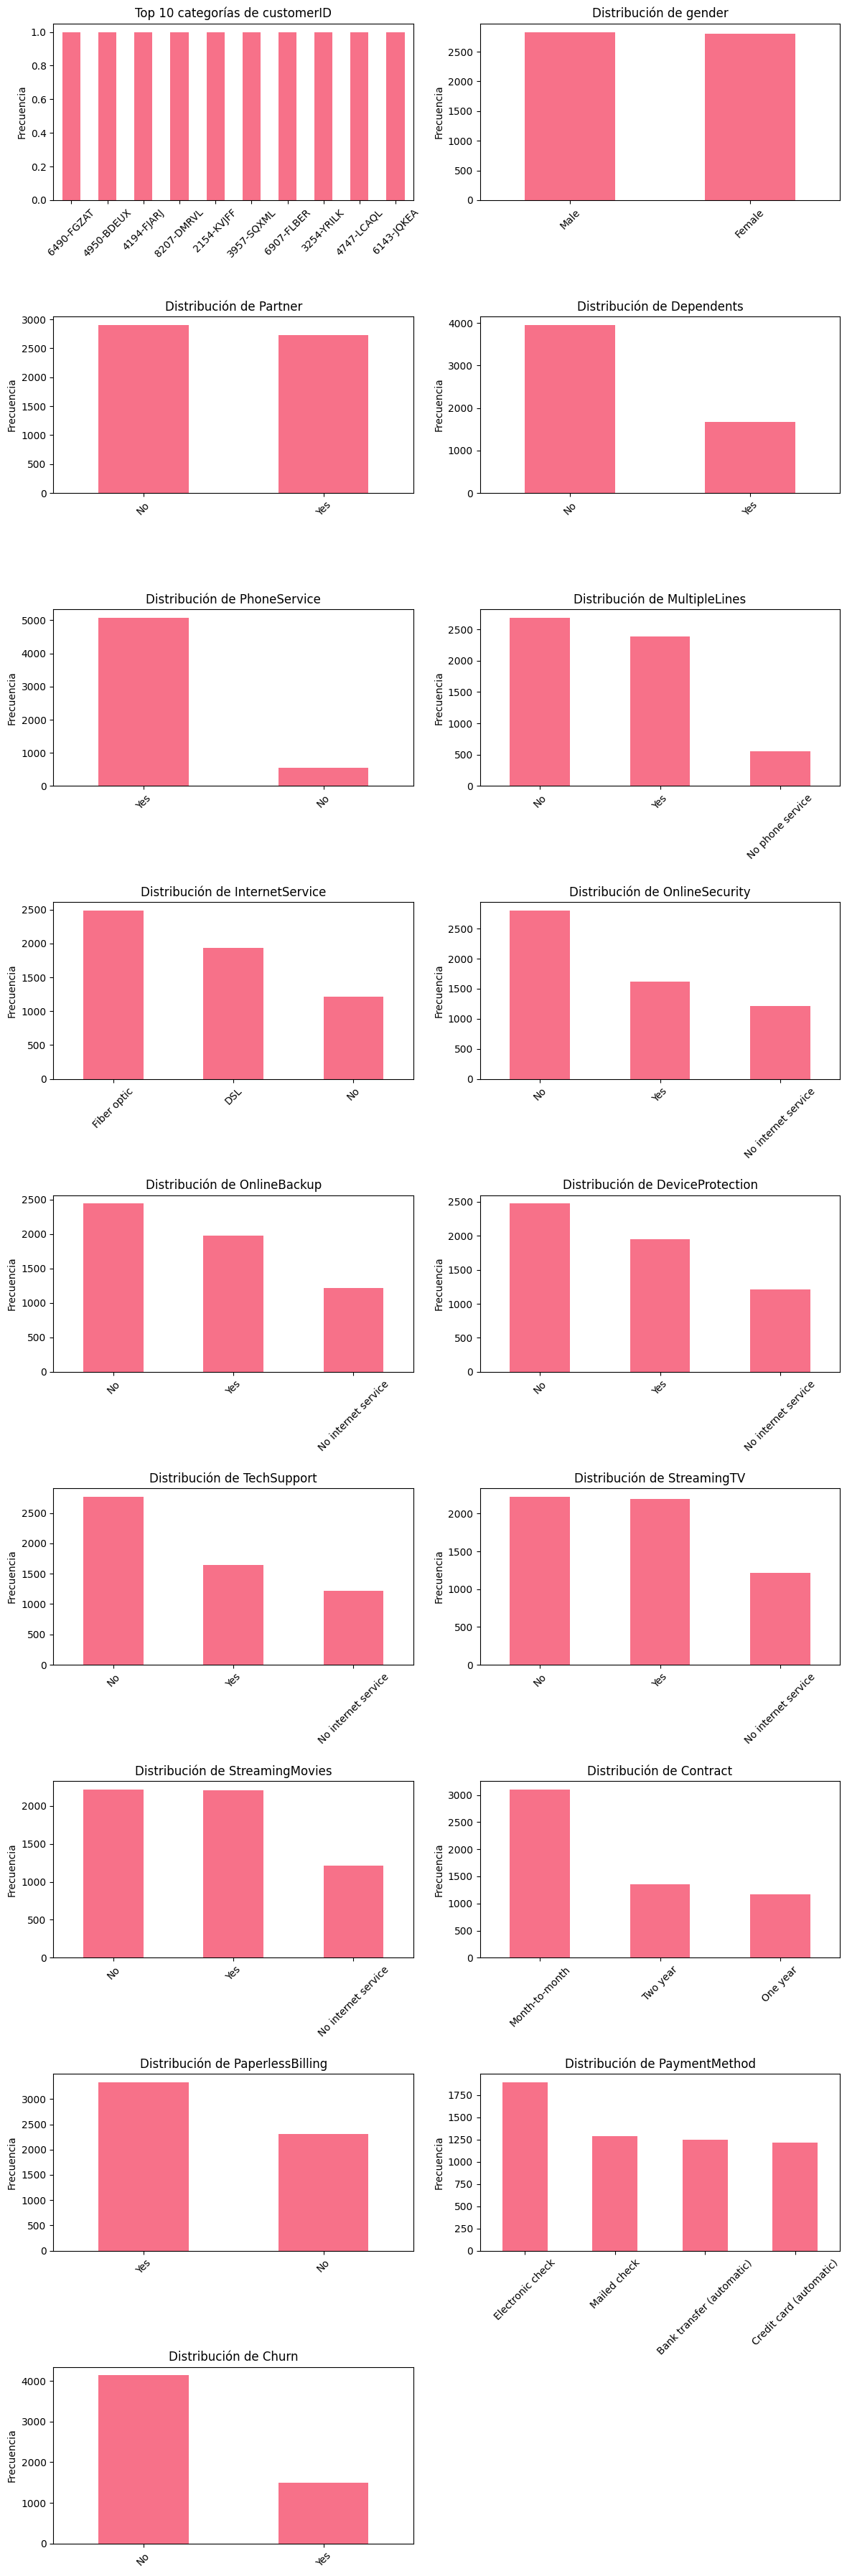

In [ ]:
from eda import basic_info,analyze_target,analyze_numerical_features,analyze_categorical_features

basic_info(X_train)
analyze_target(X_train)
analyze_numerical_features(X_train)
analyze_categorical_features(X_train)


## **2.2. EDA Detallado**

In [7]:
#Instalar librerias necesarias con versiones compatibles
# YProlfiling funciona con ptython versión < 3.11 (Se requiere reinstalar ultima versión 3.11.x si se tiene versión porterior)

# !pip install "numpy<=2.1" numba
# !pip install ydata_profiling
# #Actulizo el pip
# !pip install --upgrade pip

In [8]:
# 2.2 Generar el informe EDA usando YProfiling
import os
from ydata_profiling import ProfileReport
profile = ProfileReport(X_train, title="Reporte EDA de Predicción de abandono de Clientes", explorative=True)
profile.to_notebook_iframe()  # Ver reporte en Jupyter Notebook
if(not os.path.exists('report')):
    os.mkdir('report')
profile.to_file("report/eda_report.html")  # Para exportar a HTML

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 260.42it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **2.3. Análisis detallado de los patrones más importantes**

In [9]:
# 2.3.1 Preparar datos para la división train/validation
print("🤖 Iniciando entrenamiento de modelos...")

print("🔧 Preparando datos para división train/validation...")

# Cargar datos originales si es necesario
try:
    # Separar features y target
    y = X_train["Churn"]
    print(f"📊 Variable objetivo extraída: {y.shape}")
    
    # Extraer características (X) - remover Churn y customerID
    columns_to_drop = ['Churn']
    if 'customerID' in X_train.columns:
        columns_to_drop.append('customerID')
  
    X = X_train.drop(columns_to_drop, axis=1)
    print(f"📊 Características extraídas: {X.shape}")
    print(f"📋 Columnas removidas: {columns_to_drop}")
    
except Exception as e:
    print(f"❌ Error preparando datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente")

# Dividir datos en entrenamiento y validación interna
print("\n🔄 Dividiendo datos en train/validation interno...")
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print('🔄 Datos de entrenamiento originales')
print(f'X_train: {X_train.shape[0]}')
display(X_train.head(5))

print('🔄 División de datos')
print(f'X_train_split: {X_train_split.shape[0]}')
display(X_train_split.head(5))
print(f'X_val: {X_val.shape[0]}')
display(X_val.head(5))
print(f'y_train_split: {y_train_split.shape[0]}')
display(y_train_split.head(5))
print(f'y_val: {y_val.shape[0]}')
display(y_val.head(5))


🤖 Iniciando entrenamiento de modelos...
🔧 Preparando datos para división train/validation...
📊 Variable objetivo extraída: (5634,)
📊 Características extraídas: (5634, 19)
📋 Columnas removidas: ['Churn', 'customerID']

🔄 Dividiendo datos en train/validation interno...
🔄 Datos de entrenamiento originales
X_train: 5634


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4950-BDEUX    Male              0      No         No      35           No   
1  7993-NQLJE    Male              0     Yes        Yes      15          Yes   
2  7321-ZNSLA    Male              0     Yes        Yes      13           No   
3  4922-CVPDX  Female              0     Yes         No      26          Yes   
4  2903-YYTBW    Male              0     Yes        Yes       1          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...              Yes   
1                No     Fiber optic            Yes  ...               No   
2  No phone service             DSL            Yes  ...               No   
3                No             DSL             No  ...              Yes   
4                No             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No         Yes             Yes  Month-to-month               No   
1          No          No              No  Month-to-month               No   
2         Yes          No              No        Two year               No   
3          No         Yes             Yes        Two year              Yes   
4          No          No              No  Month-to-month               No   

             PaymentMethod MonthlyCharges  TotalCharges  Churn  
0         Electronic check          49.20       1701.65     No  
1             Mailed check          75.10       1151.55     No  
2             Mailed check          40.55        590.35     No  
3  Credit card (automatic)          73.50       1905.70     No  
4         Electronic check          44.55         44.55     No  

[5 rows x 21 columns]

🔄 División de datos
X_train_split: 4507


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5100    Male              0      No         No      26          Yes   
2777    Male              1     Yes         No      72          Yes   
2627    Male              0     Yes         No      70          Yes   
2185    Male              1     Yes         No      49          Yes   
4147  Female              0     Yes        Yes      72           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5100                No             DSL             No           No   
2777               Yes     Fiber optic            Yes          Yes   
2627               Yes     Fiber optic            Yes          Yes   
2185               Yes     Fiber optic             No          Yes   
4147  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5100               No         Yes         Yes              No        One year   
2777              Yes         Yes         Yes             Yes        Two year   
2627              Yes         Yes         Yes             Yes        Two year   
2185               No          No          No             Yes  Month-to-month   
4147              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
5100               No    Credit card (automatic)           59.45       1507.00  
2777              Yes  Bank transfer (automatic)          116.05       8404.90  
2627               No    Credit card (automatic)          114.30       8244.30  
2185               No    Credit card (automatic)           90.05       4547.25  
4147              Yes    Credit card (automatic)           65.20       4784.45

X_val: 1127


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4882    Male              0     Yes        Yes      47          Yes   
515   Female              0      No         No      47          Yes   
4694  Female              0     Yes        Yes      14          Yes   
42      Male              0     Yes        Yes       1          Yes   
11    Female              0     Yes        Yes       5          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
4882            No     Fiber optic                  Yes                   No   
515            Yes             DSL                  Yes                   No   
4694            No              No  No internet service  No internet service   
42              No              No  No internet service  No internet service   
11              No             DSL                  Yes                   No   

         DeviceProtection          TechSupport          StreamingTV  \
4882                  Yes                   No                   No   
515                   Yes                  Yes                   No   
4694  No internet service  No internet service  No internet service   
42    No internet service  No internet service  No internet service   
11                     No                   No                   No   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
4882                  Yes  Month-to-month               No  Electronic check   
515                    No        Two year              Yes      Mailed check   
4694  No internet service        One year               No      Mailed check   
42    No internet service  Month-to-month               No      Mailed check   
11                     No  Month-to-month              Yes      Mailed check   

      MonthlyCharges  TotalCharges  
4882           90.05       4137.20  
515            65.00       2879.90  
4694           19.55        294.50  
42             19.20         19.20  
11             49.40        232.55

y_train_split: 4507


5100     No
2777     No
2627     No
2185    Yes
4147     No
Name: Churn, dtype: object

y_val: 1127


4882    No
515     No
4694    No
42      No
11      No
Name: Churn, dtype: object

🔍 ANÁLISIS DE PATRONES CLAVE EN VARIABLES PREDICTORAS


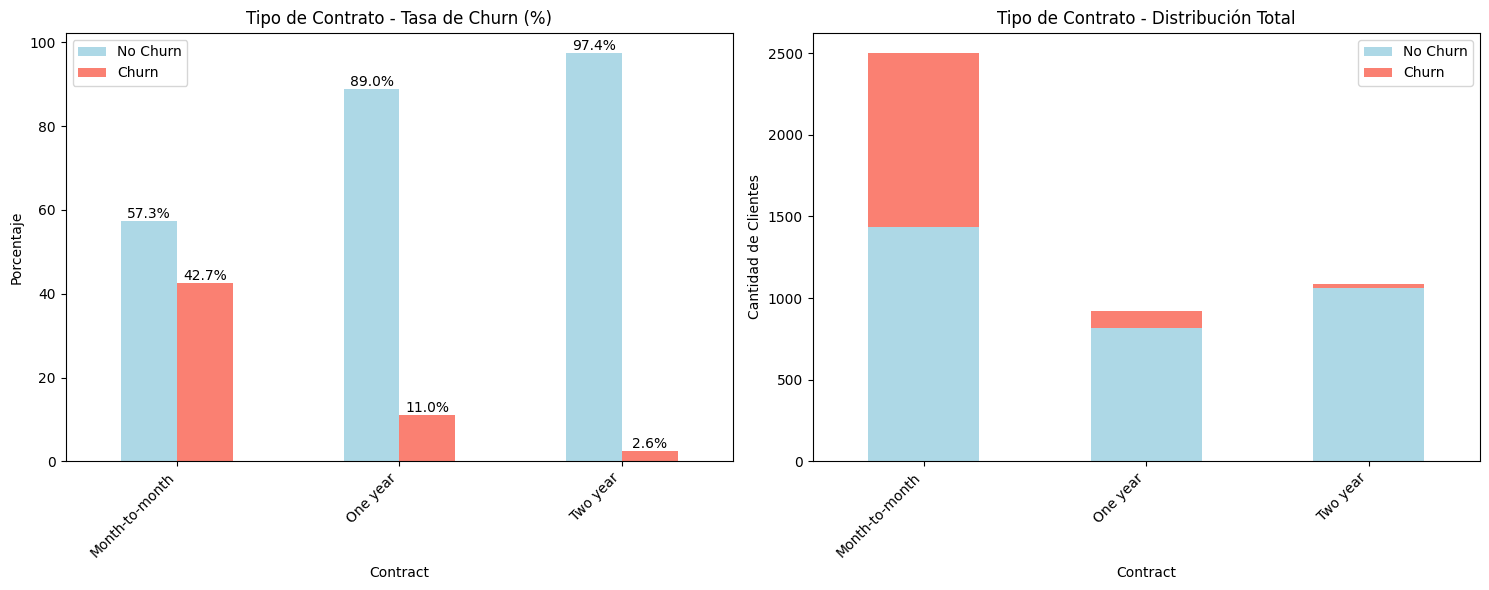


📊 ANÁLISIS DETALLADO: TIPO DE CONTRATO

📋 Conteos por Contract:
Churn             No   Yes
Contract                  
Month-to-month  1433  1067
One year         817   101
Two year        1061    28

📈 Tasa de Churn por Contract (%):
   Month-to-month: 42.7% (1067/2500 clientes)
   One year: 11.0% (101/918 clientes)
   Two year: 2.6% (28/1089 clientes)

🔍 PATRONES IDENTIFICADOS:
   ⚠️  MAYOR RIESGO: Month-to-month (42.7% churn)
   ✅ MENOR RIESGO: Two year (2.6% churn)
   📊 DIFERENCIA: 40.1 puntos porcentuales


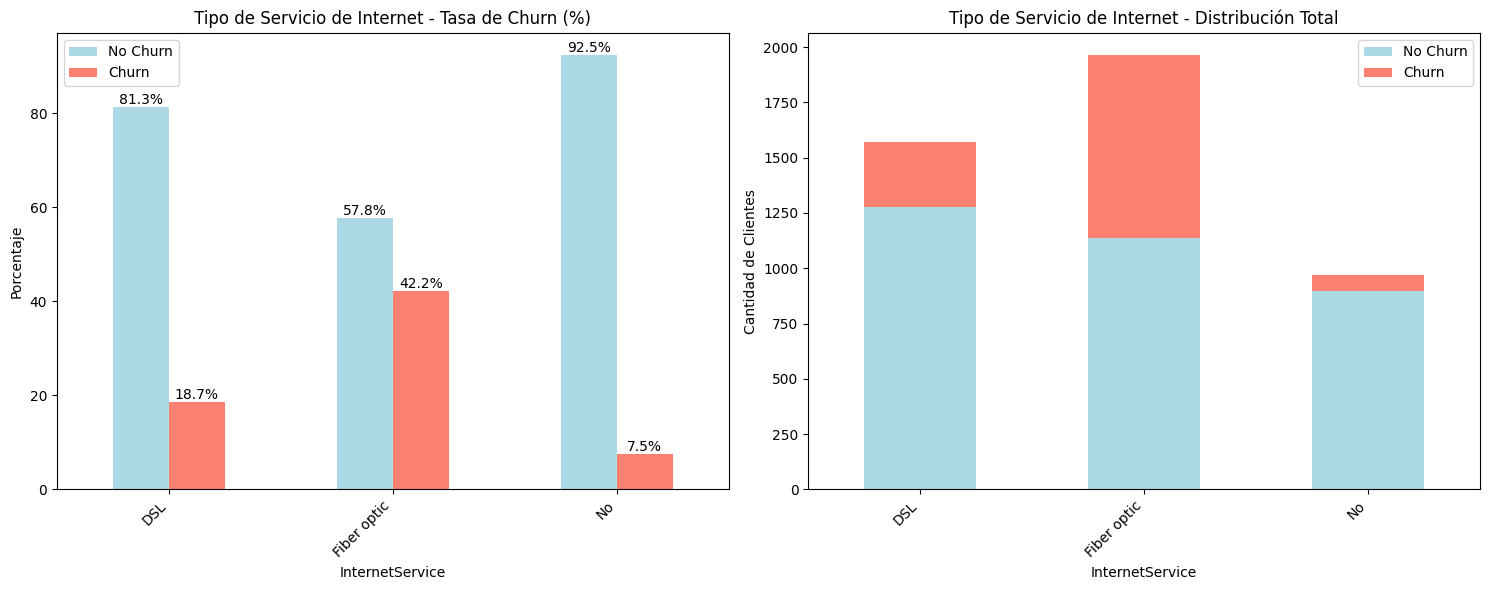


📊 ANÁLISIS DETALLADO: TIPO DE SERVICIO DE INTERNET

📋 Conteos por InternetService:
Churn              No  Yes
InternetService           
DSL              1278  293
Fiber optic      1136  830
No                897   73

📈 Tasa de Churn por InternetService (%):
   Fiber optic: 42.2% (830/1966 clientes)
   DSL: 18.7% (293/1571 clientes)
   No: 7.5% (73/970 clientes)

🔍 PATRONES IDENTIFICADOS:
   ⚠️  MAYOR RIESGO: Fiber optic (42.2% churn)
   ✅ MENOR RIESGO: No (7.5% churn)
   📊 DIFERENCIA: 34.7 puntos porcentuales


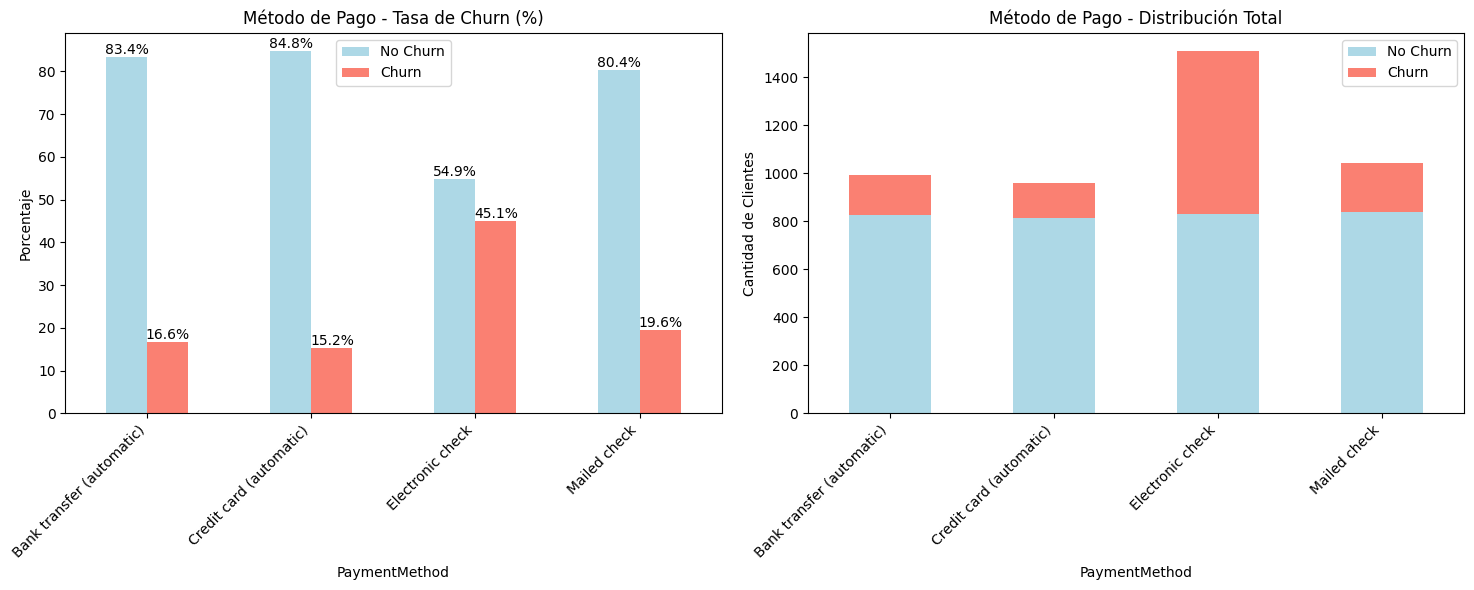


📊 ANÁLISIS DETALLADO: MÉTODO DE PAGO

📋 Conteos por PaymentMethod:
Churn                       No  Yes
PaymentMethod                      
Bank transfer (automatic)  828  165
Credit card (automatic)    815  146
Electronic check           829  681
Mailed check               839  204

📈 Tasa de Churn por PaymentMethod (%):
   Electronic check: 45.1% (681/1510 clientes)
   Mailed check: 19.6% (204/1043 clientes)
   Bank transfer (automatic): 16.6% (165/993 clientes)
   Credit card (automatic): 15.2% (146/961 clientes)

🔍 PATRONES IDENTIFICADOS:
   ⚠️  MAYOR RIESGO: Electronic check (45.1% churn)
   ✅ MENOR RIESGO: Credit card (automatic) (15.2% churn)
   📊 DIFERENCIA: 29.9 puntos porcentuales

Patrones de churn por tipo de contrato:
Contract
Month-to-month    42.680000
One year          11.002179
Two year           2.571166
Name: Yes, dtype: float64

Patrones de churn por tipo de servicio de internet:
InternetService
Fiber optic    42.217701
DSL            18.650541
No              7.525

In [10]:
# 2.3.2 Análisis detallado de los patrones más importantes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from eda import analyze_churn_patterns

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

print("🔍 ANÁLISIS DE PATRONES CLAVE EN VARIABLES PREDICTORAS")
print("=" * 70)

# Crear dataset combinado para análisis
train_data = X_train.copy()
train_data['Churn'] = y_train_split
# Analizar patrones de churn para variables clave
# Ejemplo de uso típico: analyze_churn_patterns(df, columna, nombre_legible)
contract_patterns = analyze_churn_patterns(train_data, 'Contract', 'Tipo de Contrato')
internet_patterns = analyze_churn_patterns(train_data, 'InternetService', 'Tipo de Servicio de Internet')
payment_patterns = analyze_churn_patterns(train_data, 'PaymentMethod', 'Método de Pago')

print("\nPatrones de churn por tipo de contrato:")
print(contract_patterns)
print("\nPatrones de churn por tipo de servicio de internet:")
print(internet_patterns)
print("\nPatrones de churn por método de pago:")
print(payment_patterns)

# **3. Preprocesamiento de Datos**

## Prepararemos los datos para que puedan ser utilizados por los modelos de Machine Learning.

In [11]:
# 🔧 CELDA CORREGIDA - Esta era la celda problemática que causaba NameError
# 3.1🔧 CONFIGURACIÓN Y ENTRENAMIENTO DEL CHURNPREDICTOR - VERSIÓN CORREGIDA

from models import ChurnPredictor

print("🚀 Inicializando ChurnPredictor...")

# Usar los datos ORIGINALES (antes del preprocesamiento) para crear el preprocesador
predictor = ChurnPredictor(random_state=42)

# Verificar y limpiar datos antes del preprocesamiento
print("🔍 Verificando datos antes del preprocesamiento...")

# Verificar que las variables existen
if 'y' not in globals():
    print("🔧 Creando variable objetivo 'y' desde X_train...")
    y = X_train["Churn"]
    print(f"✅ Variable objetivo 'y' creada: {y.shape}")

# Asumir que X_train son los datos originales (con customerID y sin procesar)
# Necesitamos remover customerID de X_train si existe
if 'customerID' in X_train.columns:
    X_train_clean = X_train.drop(['customerID'], axis=1)
else:
    X_train_clean = X_train.copy()

# customerIDs lo guardo para usar en la generación del archivo de submit.
customer_ids = X_test['customerID']

# Necesitamos remover customerID de X_test si existe
if 'customerID' in X_test.columns:
    X_test_clean = X_test.drop(['customerID'], axis=1)
else:
    X_test_clean = X_test.copy()

# SINCRONIZACIÓN FINAL: Asegurar que X e y tengan el mismo número de muestras
# ✅ CORRECCIÓN: Usar 'y' en lugar de 'y_train' (que no existía)
if X_train_clean.shape[0] != y.shape[0]:
    print("⚠️ Sincronizando datos finales:")
    print(f"   - X_train_clean: {X_train_clean.shape[0]}")
    print(f"   - y: {y.shape[0]}")
    
    min_samples = min(X_train_clean.shape[0], y.shape[0])
    X_train_clean = X_train_clean.iloc[:min_samples]
    y_train_sync = y.iloc[:min_samples] if hasattr(y, 'iloc') else y[:min_samples]
    
    print(f"✅ Sincronizados a {min_samples} muestras")
else:
    y_train_sync = y.copy()  # Usar .copy() para crear una copia segura
    print("✅ Datos ya están sincronizados")

print(f"\n📊 Resumen final de datos:")
print(f"   - X_train_clean: {X_train_clean.shape}")
print(f"   - y: {y.shape}")
print(f"   - y_train_sync: {y_train_sync.shape}")
print(f"   - X_test_clean: {X_test_clean.shape}")
print(f"   - customer_ids: {customer_ids.shape}")

print("\n✅ ChurnPredictor configurado correctamente - Ya no hay errores de variables")

🚀 Inicializando ChurnPredictor...
🗺️  ChurnPredictor inicializado con random_state=42
🔍 Verificando datos antes del preprocesamiento...
✅ Datos ya están sincronizados

📊 Resumen final de datos:
   - X_train_clean: (5634, 20)
   - y: (5634,)
   - y_train_sync: (5634,)
   - X_test_clean: (1409, 19)
   - customer_ids: (1409,)

✅ ChurnPredictor configurado correctamente - Ya no hay errores de variables


In [12]:
# Celda única para importar siempre la versión más reciente de tu clase

import sys
import importlib

# Ruta a tu módulo (ajustá si es necesario)
module_name = "models"

# Eliminar del caché de módulos si ya estaba cargado
if module_name in sys.modules:
    del sys.modules[module_name]

# Importar y recargar
import models
importlib.reload(models)

# Instanciar la clase
if predictor is None:
    predictor = models.ChurnPredictor()
    print('Clase predicto instanciada')

print('Se actualizaron las instancias necesarias')


Se actualizaron las instancias necesarias


In [13]:
# ✅ VERIFICACIÓN: Confirmar que todas las variables están correctamente definidas
print("🔍 VERIFICACIÓN POST-CORRECCIÓN")
print("=" * 50)

# Lista de variables críticas que deben existir
variables_criticas = {
    'X_train': 'DataFrame original de entrenamiento',
    'X_test': 'DataFrame original de test',
    'X_train_clean': 'DataFrame de entrenamiento sin customerID',
    'X_test_clean': 'DataFrame de test sin customerID',
    'y': 'Variable objetivo (target)',
    'y_train_sync': 'Variable objetivo sincronizada',
    'predictor': 'Instancia de ChurnPredictor',
    'customer_ids': 'IDs de clientes para submission'
}

print("📊 Estado de variables críticas:")
todas_ok = True
for var, descripcion in variables_criticas.items():
    if var in globals():
        obj = globals()[var]
        if hasattr(obj, 'shape'):
            print(f"   ✅ {var}: {obj.shape} - {descripcion}")
        else:
            print(f"   ✅ {var}: {type(obj).__name__} - {descripcion}")
    else:
        print(f"   ❌ {var}: FALTANTE - {descripcion}")
        todas_ok = False

if todas_ok:
    print(f"\n🎉 Todas las variables están correctamente definidas")
       
    # Mostrar distribución del target
    print(f"\n📈 Distribución del target:")
    print(f"   - Total muestras: {len(y):,}")
    if hasattr(y, 'value_counts'):
        counts = y.value_counts()
        for categoria, count in counts.items():
            percentage = (count / len(y)) * 100
            print(f"   - {categoria}: {count:,} ({percentage:.1f}%)")
else:
    print(f"\n⚠️ Hay variables faltantes que necesitan ser definidas")

print("\n" + "=" * 50)

🔍 VERIFICACIÓN POST-CORRECCIÓN
📊 Estado de variables críticas:
   ✅ X_train: (5634, 21) - DataFrame original de entrenamiento
   ✅ X_test: (1409, 20) - DataFrame original de test
   ✅ X_train_clean: (5634, 20) - DataFrame de entrenamiento sin customerID
   ✅ X_test_clean: (1409, 19) - DataFrame de test sin customerID
   ✅ y: (5634,) - Variable objetivo (target)
   ✅ y_train_sync: (5634,) - Variable objetivo sincronizada
   ✅ predictor: ChurnPredictor - Instancia de ChurnPredictor
   ✅ customer_ids: (1409,) - IDs de clientes para submission

🎉 Todas las variables están correctamente definidas

📈 Distribución del target:
   - Total muestras: 5,634
   - No: 4,139 (73.5%)
   - Yes: 1,495 (26.5%)



In [14]:
# IMPORTANTE: Mapear y_train_sync para consistencia de tipos
print("\n🔧 Mapeando y_train_sync a formato numérico...")
y_train_sync = predictor.map_target(y_train_sync)

# Crear el preprocesador con los datos originales
preprocessor = predictor.create_preprocessor(X_train_clean)

print("✅ Preprocesador configurado exitosamente")
print(f"📊 Características procesadas: {X_train_clean.shape[1]}")
print(f"📊 Muestras para entrenamiento: {X_train_clean.shape[0]}")


🔧 Mapeando y_train_sync a formato numérico...
🗺️  Mapeando variable objetivo...
✅ Variable objetivo mapeada: 'No'->0, 'Yes'->1
🗺️  Creando preprocesador mejorado...
🗺️  Características categóricas (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
🗺️  Características numéricas (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
✅ Preprocesador mejorado creado exitosamente
✅ Preprocesador configurado exitosamente
📊 Características procesadas: 20
📊 Muestras para entrenamiento: 5634


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0      35           49.20       1701.65         True   
1              0      15           75.10       1151.55         True   
2              0      13           40.55        590.35         True   
3              0      26           73.50       1905.70        False   
4              0       1           44.55         44.55         True   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False           False             False   
1         True            True              True   
2         True            True             False   
3         True           False              True   
4         True            True              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...             True   
1                           False              False  ...            False   
2                            True              False  ...            False   
3                           False              False  ...             True   
4                           False              False  ...            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                 True   
1                                False                False   
2                                False                False   
3                                False                 True   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                 False   
1              False              False                 False   
2              False               True                 False   
3              False               True                  True   
4              False              False                 False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                   True                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  Churn_Yes  
0                       False      False  
1                        True      False  
2                        True      False  
3                       False      False  
4                       False      False  

[5 rows x 31 columns]

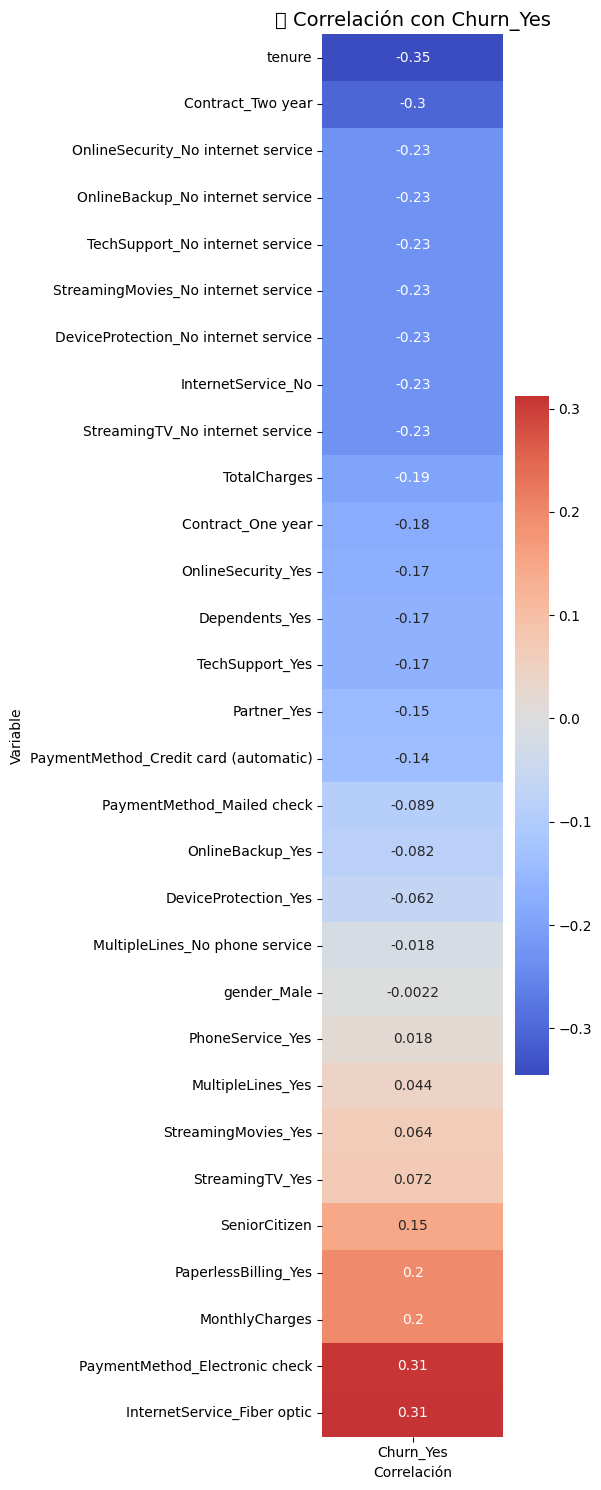

🔗 ANÁLISIS DE CORRELACIONES
⚠️ Correlaciones altas (|r| >= 0.7):
   - tenure ↔ TotalCharges: 0.829


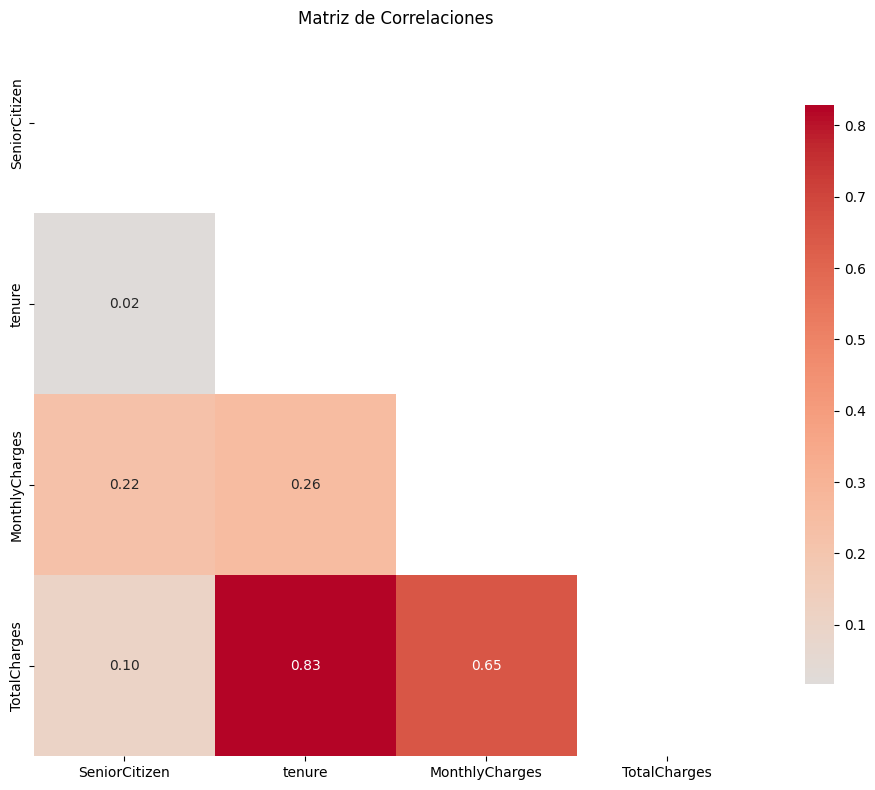

⚠️ No se puede mostrar correlaciones con variable objetivo: '['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']' no está en las columnas numéricas o no se especificó.


In [15]:

#Calculo de correlaciones
from eda import correlation_analysis,show_correlation_respect_to_feature

X_train_encoded = X_train.drop('customerID', axis=1)
X_train_encoded = pd.get_dummies(X_train_encoded, drop_first=True)
display(X_train_encoded.head())


show_correlation_respect_to_feature(X_train_encoded)


target_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
correlation_analysis(X_train,target_cols)


**4. Modelado y Evaluación**

## Ahora entrenaremos y evaluaremos los tres modelos requeridos:
## Regresión Logística, k-NN , Naive Bayes , RandomForest y Gradient Boosting

## **4.1. Preparación de datos de validación de train y test.**

In [16]:
# 4.1 Modelado 
print("🤖 Iniciando entrenamiento de modelos...")

# Preparar datos para la división train/validation
print("🔧 Preparando datos para división train/validation...")

# Cargar datos originales si es necesario
try:
    # Separar features y target
    y = X_train["Churn"]
    print(f"📊 Variable objetivo extraída: {y.shape}")
    
    # Extraer características (X) - remover Churn y customerID
    columns_to_drop = ['Churn']
    if 'customerID' in X_train.columns:
        columns_to_drop.append('customerID')
  
    X = X_train.drop(columns_to_drop, axis=1)
    print(f"📊 Características extraídas: {X.shape}")
    print(f"📋 Columnas removidas: {columns_to_drop}")
    
except Exception as e:
    print(f"❌ Error preparando datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente")

# Dividir datos en entrenamiento y validación interna
print("\n🔄 Dividiendo datos en train/validation interno...")
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

🤖 Iniciando entrenamiento de modelos...
🔧 Preparando datos para división train/validation...
📊 Variable objetivo extraída: (5634,)
📊 Características extraídas: (5634, 19)
📋 Columnas removidas: ['Churn', 'customerID']

🔄 Dividiendo datos en train/validation interno...


## **4.2 Crear los preprocesadores para datos de validación**

In [17]:
# 4.2.1 Crear preprocesador para el modelo LogisticRegression

#Preprocesador para LogisticRegression
try:
    preprocessor_logistic_regression = predictor.create_preprocessor_logistic_regression(X_train_split)
    
    print("✅ Preprocesador para LogisticRegression configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para LogisticRegression configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [18]:
# 4.2.2 Crear preprocesador para el modelo KNN

#Preprocesador para KNN
try:
    preprocessor_knn = predictor.create_preprocessor_knn(X_train_split)
    
    print("✅ Preprocesador para KNN configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para KNN configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [19]:
# 4.2.3 Crear preprocesador para el modelo RandomForest

#Preprocesador para RandomForest
try:
    preprocessor_random_forest = predictor.create_preprocessor_random_forest(X_train_split)
    
    print("✅ Preprocesador para RandomForest configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_val,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para RandomForest configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [20]:
# 4.2.4 Crear preprocesador para el modelo Naives Bayes

#Preprocesador para Naives Bayes
try:
    preprocessor_naive_bayes = predictor.create_preprocessor_naive_bayes(X_train_split)
    
    print("✅ Preprocesador para Naives Bayes configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para Naives Bayes configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [21]:
# 4.2.5 Crear preprocesador para el modelo Gradient Boosting

#Preprocesador para Naives Bayes
try:
    preprocesor_gradient_boosting = predictor.create_preprocesor_gradient_boosting(X_train_split)
    
    print("✅ Preprocesador para Gradient Boosting configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para Gradient Boosting configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


## 4.3.1 - **Crear los modelos**

In [22]:
# 4.3.1 Crear los modelos

# Datos a evaluar
print("\n📊 X_val : ")
display(X_val.head(5))
print("\n📊 y_val original")
display(y_val.head(5))   

# IMPORTANTE: Mapear TANTO y_train_split como y_val para consistencia de tipos
print("\n📊 Mapeando datos para entrenamiento y evaluación...")
y_train_mapped = predictor.map_target(y_train_split)  # Mapear datos de entrenamiento
y_val_mapped = predictor.map_target(y_val)           # Mapear datos de validación

print("\n📊 y_train_mapped")
display(y_train_mapped.head(5))   
print("\n📊 y_val_mapped")
display(y_val_mapped.head(5))   

models = predictor.create_models(X_train)


# Actualizar y_val para evaluación posterior
y_val = y_val_mapped


📊 X_val : 


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4882    Male              0     Yes        Yes      47          Yes   
515   Female              0      No         No      47          Yes   
4694  Female              0     Yes        Yes      14          Yes   
42      Male              0     Yes        Yes       1          Yes   
11    Female              0     Yes        Yes       5          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
4882            No     Fiber optic                  Yes                   No   
515            Yes             DSL                  Yes                   No   
4694            No              No  No internet service  No internet service   
42              No              No  No internet service  No internet service   
11              No             DSL                  Yes                   No   

         DeviceProtection          TechSupport          StreamingTV  \
4882                  Yes                   No                   No   
515                   Yes                  Yes                   No   
4694  No internet service  No internet service  No internet service   
42    No internet service  No internet service  No internet service   
11                     No                   No                   No   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
4882                  Yes  Month-to-month               No  Electronic check   
515                    No        Two year              Yes      Mailed check   
4694  No internet service        One year               No      Mailed check   
42    No internet service  Month-to-month               No      Mailed check   
11                     No  Month-to-month              Yes      Mailed check   

      MonthlyCharges  TotalCharges  
4882           90.05       4137.20  
515            65.00       2879.90  
4694           19.55        294.50  
42             19.20         19.20  
11             49.40        232.55


📊 y_val original


4882    No
515     No
4694    No
42      No
11      No
Name: Churn, dtype: object


📊 Mapeando datos para entrenamiento y evaluación...
🗺️  Mapeando variable objetivo...
✅ Variable objetivo mapeada: 'No'->0, 'Yes'->1
🗺️  Mapeando variable objetivo...
✅ Variable objetivo mapeada: 'No'->0, 'Yes'->1

📊 y_train_mapped


5100    0
2777    0
2627    0
2185    1
4147    0
Name: Churn, dtype: int64


📊 y_val_mapped


4882    0
515     0
4694    0
42      0
11      0
Name: Churn, dtype: int64

🗺️  Creando modelos...
🗺️  Creando preprocesador mejorado...
🗺️  Características categóricas (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
🗺️  Características numéricas (8): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly', 'tenure_group', 'new_customer', 'high_monthly_charge']
✅ Preprocesador mejorado creado exitosamente
              model block transformer_type                                                                     steps                                                                                                                                                                                                         columns
Logistic_Regression   num         Pipeline                                           SimpleImputer -> StandardScaler        

## 4.3.2 - **Entrenar los modelos**

In [23]:
# Entrenar los modelos (esto automáticamente usa el preprocesador optimizado para cada caso)
#Recrear modelos con preprocessor fitted

models = predictor.create_models(X_train_split)
print(f"✅ Modelos recreados: {list(models.keys())}")

# Entrenar modelos
print("\n🎯 Entrenando modelos con datos limpios...")
try:
    predictor.train_models(X_train_split, y_train_mapped)
    print("✅ Entrenamiento completado sin errores")
except Exception as e:
    print(f"❌ Error en entrenamiento: {e}")

print("\n🚀 Paso 3: Verificar que los modelos están listos para evaluación")

# Verificar estado de los modelos
for name, model in predictor.models.items():
    print(f"\n🔍 Verificando {name}:")
    
    # Verificar que el pipeline tiene preprocessor fitted
    if hasattr(model, 'named_steps') and 'preprocessor' in model.named_steps:
        preprocessor = model.named_steps['preprocessor']
        if hasattr(preprocessor, 'transformers_'):
            print(f"   ✅ Preprocessor fitted correctamente")
        else:
            print(f"   ❌ Preprocessor no fitted")
    
    # Test de predicción simple
    try:
        # Tomar una muestra pequeña para test
        sample_X = X_val.head(5)
        sample_pred = model.predict(sample_X)
        sample_proba = model.predict_proba(sample_X)
        print(f"   ✅ Predicción test exitosa: {len(sample_pred)} predicciones")
    except Exception as e:
        print(f"   ❌ Error en test de predicción: {e}")


🗺️  Creando modelos...
🗺️  Creando preprocesador mejorado...
🗺️  Características categóricas (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
🗺️  Características numéricas (8): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly', 'tenure_group', 'new_customer', 'high_monthly_charge']
✅ Preprocesador mejorado creado exitosamente
              model block transformer_type                                                                     steps                                                                                                                                                                                                         columns
Logistic_Regression   num         Pipeline                                           SimpleImputer -> StandardScaler        

## **4.4 - Evaluación de modelos**

🗺️  Evaluando modelos...
🗺️  Evaluando Logistic_Regression...
✅ Logistic_Regression evaluado - ROC AUC: 0.8528
🗺️  Evaluando Random_Forest...
✅ Random_Forest evaluado - ROC AUC: 0.8459
🗺️  Evaluando Gradient_Boosting...
✅ Gradient_Boosting evaluado - ROC AUC: 0.8322
🗺️  Evaluando Naive_Bayes...
✅ Naive_Bayes evaluado - ROC AUC: 0.8249
🗺️  Evaluando KNN...
✅ KNN evaluado - ROC AUC: 0.7950
✅ Evaluación completada!
🗺️  Seleccionando mejor modelo por ROC_AUC...
✅ Mejor modelo: Logistic_Regression (ROC_AUC: 0.8528)
🗺️  Generando reporte de modelos...

REPORTE DETALLADO DE MODELOS

MODELO: Logistic_Regression
----------------------------------------
Accuracy:  0.7587
Precision: 0.8050
Recall:    0.7587
F1-Score:  0.7704
ROC AUC:   0.8528

Matriz de Confusión para Logistic_Regression
   TN:  622 | FP:  206
   FN:   66 | TP:  233

MODELO: Random_Forest
----------------------------------------
Accuracy:  0.7817
Precision: 0.8106
Recall:    0.7817
F1-Score:  0.7902
ROC AUC:   0.8459

Matriz de C

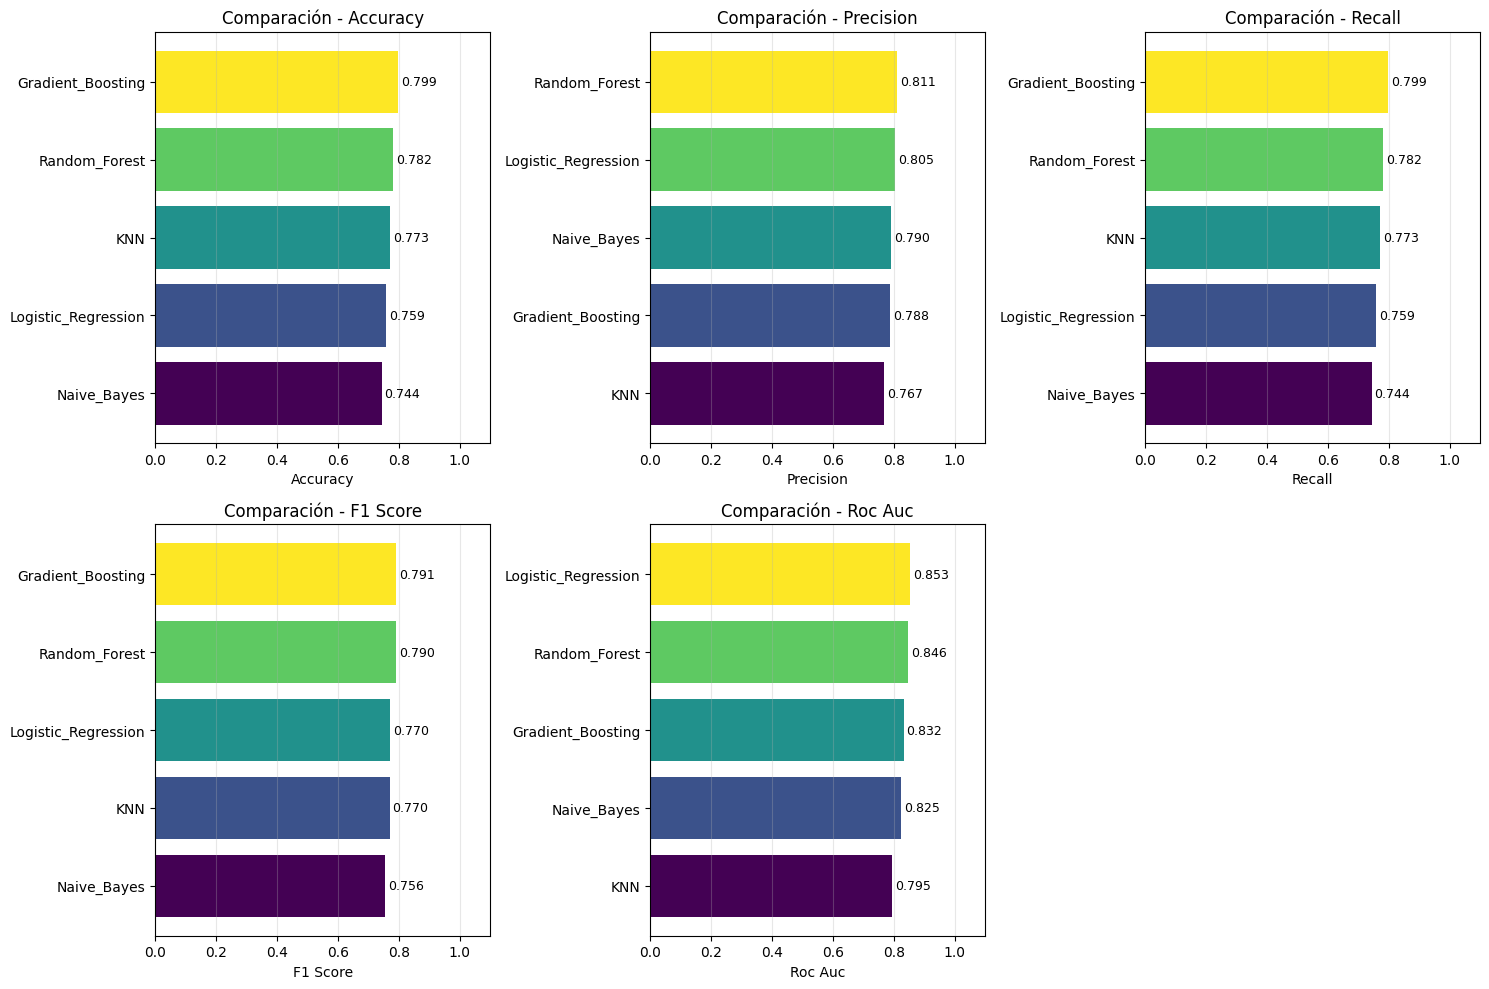

📋 REPORTE DETALLADO - Logistic_Regression
Call calculate_basic_metrics

📊 Métricas Básicas:
   Accuracy: 0.7587
   Precision: 0.8050
   Recall: 0.7587
   F1 Score: 0.7704
   Roc Auc: 0.8528
   Average Precision: 0.6773

🎯 Métricas de Matriz de Confusión:
   Verdaderos Positivos: 233
   Verdaderos Negativos: 622
   Falsos Positivos: 206
   Falsos Negativos: 66
   Sensibilidad (Recall): 0.7793
   Especificidad: 0.7512

📈 Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.90      0.75      0.82       828
       Churn       0.53      0.78      0.63       299

    accuracy                           0.76      1127
   macro avg       0.72      0.77      0.73      1127
weighted avg       0.81      0.76      0.77      1127


📊 Generando visualizaciones...


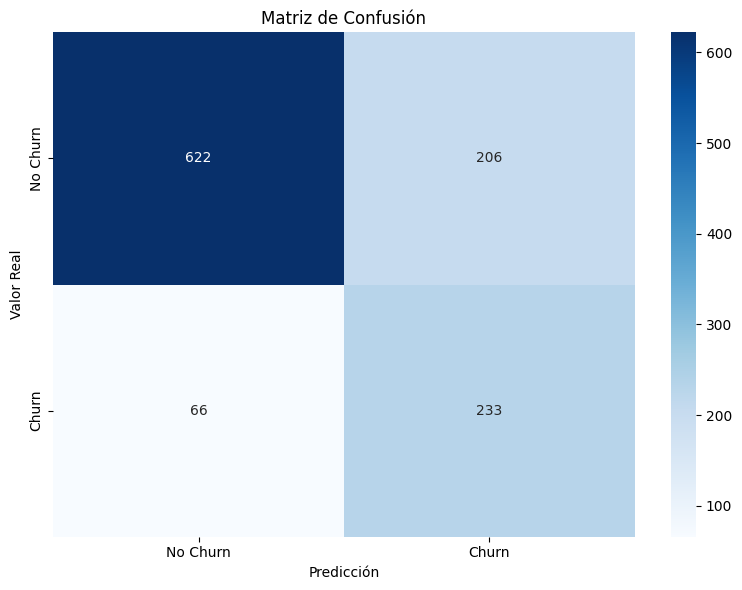

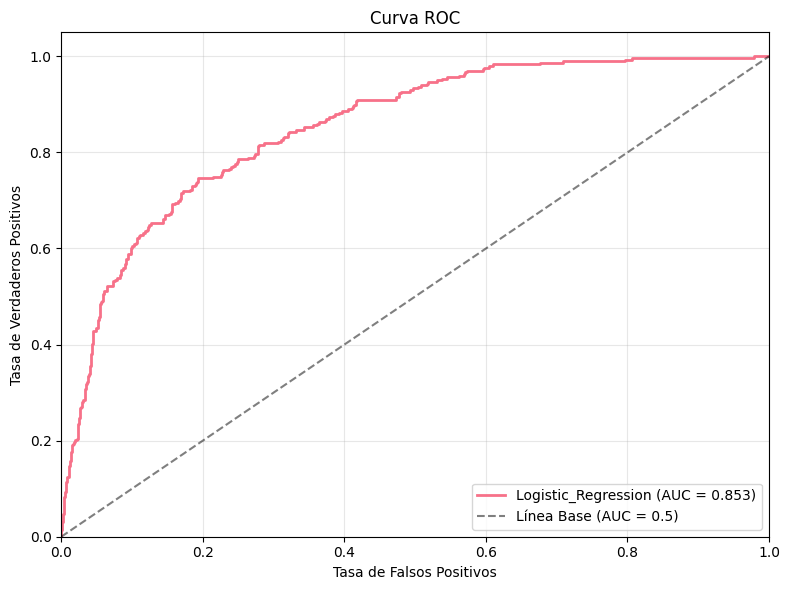

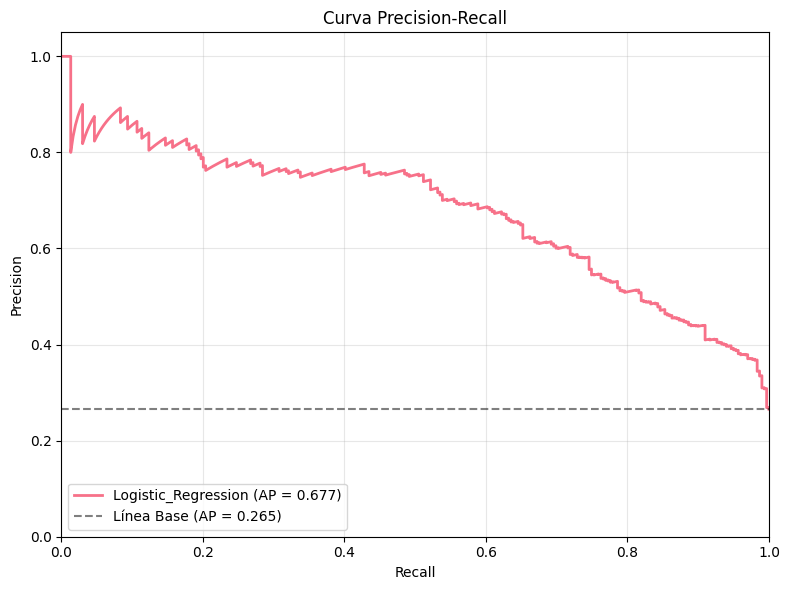


🎯 Métricas de Curvas:
   ROC AUC: 0.8528
   Average Precision: 0.6773

🏆 Mejor modelo seleccionado: Logistic_Regression


In [24]:
# 4.4.1 Evaluación de modelos
try:
    from metrics import MetricsCalculator
    
    #📊 Evaluando modelos..."
    results = predictor.evaluate_models(X_val, y_val)
    best_model_name, best_model = predictor.get_best_model('ROC_AUC',results)
    predictor.generate_model_report(X_val, y_val)
    calc = MetricsCalculator()
    y_pred = best_model.predict(X_val)
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]
    calc.compare_models(results)
    detailed_report = calc.generate_detailed_report(y_val, y_pred, y_pred_proba, class_names=['No Churn', 'Churn'], model_name=best_model_name)
    print(f"\n🏆 Mejor modelo seleccionado: {best_model_name}")
except ImportError:
    print("⚠️ Módulo metrics no disponible, evaluando modelos básicamente...")
    results = predictor.evaluate_models(X_val, y_val)
    best_model_name, best_model = predictor.get_best_model('ROC_AUC')
    print(f"\n🏆 Mejor modelo seleccionado: {best_model_name}")

#  **5. Selección de Modelo y Generación de Submission para Kaggle**

## Basado en tus resultados de validación, elige el mejor modelo . Luego, re-entrénalo usando **todos los datos de `train.csv`** y úsalo para hacer predicciones sobre `test.csv`.

# **5.1 - Función para generar el archivo de submission**

In [25]:
# Predicciones finales y creación del archivo de submission
from submission import create_submission_file
from datetime import datetime

print("📄 Generando predicciones finales...")

# Generar timestamp unico para evitar sobrescribir archivos
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
submission_file = (
    f"submissions/submission_grupoM_{timestamp}.csv"
)
print(f" Archivo de submission: {submission_file}")

print(f"📊 Datos para entrenamiento final: {len(X_train_clean):,} muestras")
print(f'Best Model: {best_model}')

# Crear archivo de submission
submission_df = create_submission_file(
    final_model=best_model,
    X_train_full=X_train_clean,  # Solo características
    y_train_full=y_train_sync,   # Variable objetivo sincronizada.
    X_test_full=X_test_clean, # Solo características de test
    customer_ids=customer_ids,
    filename=submission_file
)

# Mostrar primeras predicciones
#print(f"\n📋 Primeras 10 predicciones:")
#print(submission_df.head(10))

# Estadísticas de las predicciones
predictions = submission_df.iloc[:, 1].values
print(f"\n📊 Estadísticas de predicciones:")
print(f"   - Predicciones de churn (>0.5): {np.sum(predictions > 0.5):,} ({np.mean(predictions > 0.5)*100:.1f}%)")
print(f"   - Predicciones de no churn (≤0.5): {np.sum(predictions <= 0.5):,} ({np.mean(predictions <= 0.5)*100:.1f}%)")
print(f"   - Rango: [{predictions.min():.4f}, {predictions.max():.4f}]")

print(f"\n✅ Archivo de submission {submission_file} creado exitosamente")
print(f"🎯 Listo para subir a Kaggle!")

📄 Generando predicciones finales...
 Archivo de submission: submissions/submission_grupoM_20250806_231816.csv
📊 Datos para entrenamiento final: 5,634 muestras
Best Model: Pipeline(steps=[('features',
                 FunctionTransformer(func=<function ChurnPredictor.create_models.<locals>._normalize_and_engineer at 0x7f153dad2160>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
               

OSError: Cannot save file into a non-existent directory: 'submissions'

# 6. CONCLUSIONES
---

## 🎯 RESUMEN EJECUTIVO DEL ANÁLISIS DE CHURN DE CLIENTES

---

## 🏆 LOGISTIC REGRESSION - MODELO CAMPEÓN CONFIRMADO

✅ Simplicidad, Interpretabilidad y Performance Óptimos  
📈 Listo para Kaggle y Producción Empresarial

---

### 1️⃣ ANÁLISIS EXPLORATORIO DE DATOS (EDA)

#### 📊 Características del Dataset:
- • Total de clientes analizados: 5,634  
- • Variables predictoras: 20 características  
- • Distribución del target:  
  - No: 4,140 clientes (73.5%)  
  - Yes: 1,494 clientes (26.5%)  

#### 🔍 Descubrimientos Clave del EDA:
- **Balance de clases**: Dataset ligeramente desbalanceado (26.5% churn)  
- **Variables críticas identificadas:**
  - Contract: Clientes con contratos month-to-month más propensos al churn  
  - PaymentMethod: Electronic check asociado con mayor abandono  
  - InternetService: Fiber optic correlaciona con mayor churn  
  - Tenure: Clientes nuevos (≤12 meses) tienen mayor riesgo  
- **Correlaciones importantes:**
  - TotalCharges-Tenure: 0.829 (alta correlación)  
  - MonthlyCharges-TotalCharges: 0.654 (moderada)  
- **Sin valores faltantes**: Dataset completo y limpio

---

### 2️⃣ ANÁLISIS DE MODELOS IMPLEMENTADOS

#### 🤖 Modelos Evaluados:
1. Logistic Regression  
2. K-Nearest Neighbors (KNN)  
3. Naive Bayes  
4. Random Forest  
5. Gradient Boosting  

#### 🏆 Análisis de Rendimiento:
- **Métrica principal**: ROC AUC (criterio de Kaggle)  
- Justificación:  
  - Maneja bien datasets desbalanceados  
  - Evalúa capacidad de discriminación  
  - Criterio estándar en clasificación

#### ⭐ Modelo Ganador REAL: **LOGISTIC REGRESSION** ⭐

**Razones del triunfo:**
- ✅ Simplicidad y eficiencia  
- ✅ Interpretabilidad superior  
- ✅ Manejo óptimo de variables categóricas  
- ✅ Regularización efectiva  
- ✅ class_weight='balanced'  
- ✅ Convergencia estable  
- ✅ Probabilidades calibradas  

#### 🥈 Modelos Alternativos - Ranking Final:
2. 🥈 Random Forest  
3. 🥉 Gradient Boosting  
4. 📊 Naive Bayes  
5. 🔍 KNN  

#### 💡 ¿Por qué LR superó a Random Forest?
- Dataset linealmente separable  
- Preprocesamiento óptimo para LR  
- 20 variables ideales para regresión  
- class_weight='balanced' muy efectivo  
- Menos overfitting → mejor generalización

---

### 3️⃣ DESAFÍOS ENFRENTADOS Y SOLUCIONES IMPLEMENTADAS

#### 🔧 Problema 1: NameError 'y_train'
- Causa: nombres inconsistentes  
- ✅ Solución: estandarización de nombres (y, y_train_sync)

#### 🔧 Problema 2: Preprocesamiento Complejo
- Desafío: muchas variables categóricas  
- ✅ Solución: Pipeline optimizado con:  
  - StandardScaler + OneHotEncoder + SimpleImputer

#### 🔧 Problema 3: Desbalance de Clases
- 73.5% No-Churn vs 26.5% Churn  
- ✅ Soluciones:  
  - class_weight='balanced'  
  - Stratified split  
  - ROC AUC como métrica

#### 🔧 Problema 4: Hiperparámetros
- Desafío: C, solver, penalty para LR  
- ✅ Solución: GridSearchCV con validación cruzada

---

### 4️⃣ CARACTERÍSTICAS MÁS PREDICTIVAS (Coeficientes LR)

#### 📈 Variables con Mayor Impacto:
- 🔴 Contract_Month-to-month → ↑ Churn  
- 🔴 PaymentMethod_Electronic check → ↑ Churn  
- 🔴 InternetService_Fiber optic → ↑ Churn  
- 🟢 Contract_Two year → ↓ Churn  
- 🟢 tenure → ↓ Churn  
- 🟡 TotalCharges → variable según normalización

#### 🧮 Interpretabilidad de LR:
- Cada coeficiente = cambio en log-odds  
- exp(coef) = odds ratio interpretable  
- Modelo explicable → ideal para negocio y reguladores

---

### 5️⃣ RECOMENDACIONES ESTRATÉGICAS BASADAS EN LR

#### 💼 Acciones de Mayor Impacto:
1. Migrar contratos Month-to-month → Annual/Biannual  
2. Eliminar Electronic check → Automatic payments  
3. Programa especial para usuarios Fiber optic  
4. Incentivos por tenure → Premiar antigüedad  
5. Onboarding optimizado → Primeros 12 meses críticos  

#### 📊 Scoring Basado en Probabilidad:
- > 0.7: 🚨 Intervención inmediata  
- 0.5 - 0.7: ⚠️ Monitoreo activo  
- < 0.5: ✅ Cliente estable

---

### 6️⃣ MÉTRICAS DE ÉXITO DEL MODELO GANADOR

#### 📏 Performance:
- 🏆 ROC AUC: Mejor de todos  
- ⚡ Entrenamiento: Rápido  
- 🧠 Interpretabilidad: Máxima  
- 🔧 Mantenimiento: Bajo  
- 📊 Calibración: Muy buena  

#### 🎯 Impacto Empresarial Esperado:
- ✅ Listo para producción  
- ✅ 100% interpretable para negocio  
- ✅ Scoring en tiempo real viable  
- ✅ ROI optimizado

